<a href="https://colab.research.google.com/github/lilian662/SIMULACION-I/blob/main/CatalogosimulacionI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Catálogo de Distribuciones de Probabilidad
## Simulación

Este documento contiene la descripción teórica y el seudocódigo de las principales distribuciones de probabilidad continuas y discretas.

Incluye:
- Definición
- Función de densidad o masa
- Función de distribución acumulada
- Media y varianza
- Seudocódigo de simulación

## Índice

1. Distribución Uniforme Continua  
2. Distribución Triangular  
3. Distribución Exponencial  
4. Distribución m-Erlang  
5. Distribución Gamma  
6. Distribución Weibull  
7. Distribución Normal  
8. Distribución Log-normal  
9. Distribución Beta  
10. Distribución Uniforme Discreta  
11. Distribución Bernoulli  
12. Distribución Geométrica  
13. Distribución Binomial Negativa  
14. Distribución de Poisson  
15. Distribución t-student
16. Distribucion Chi-cuadrada
17. Distribucion F de Fisher
18. Distribucion log-logistica
19. Distribucion Jonhson
20. Distribución Binomial
21. Distribución Hipergeometrica
22. Distribución Cauchy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *

#  Distribución Uniforme Continua

### Notación
$$
X \sim U(a,b), \quad a < b
$$

### Función de densidad (PDF)
$$
f(x)=
\begin{cases}
\frac{1}{b-a}, & a \le x \le b \\
0, & \text{en otro caso}
\end{cases}
$$

### Función de distribución acumulada (CDF)
$$
F(x)=
\begin{cases}
0, & x<a \\
\frac{x-a}{b-a}, & a \le x \le b \\
1, & x>b
\end{cases}
$$

### Media
$$
E(X)=\frac{a+b}{2}
$$

### Varianza
$$
Var(X)=\frac{(b-a)^2}{12}
$$

### Seudocódigo

1. Generar $u \sim U(0,1)$  
2. Calcular $X = a + (b-a)u$  
3. Retornar $X$

###  Simulación

Si $U \sim U(0,1)$, entonces:

$$
X=a+(b-a)U
$$

y se cumple:

$$
X \sim U(a,b)
$$

###  Pseudocódigo – Uniforme Continua

1. Generar U ~ U(0,1)
2. Calcular:
   X = a + (b - a) * U
3. Retornar X

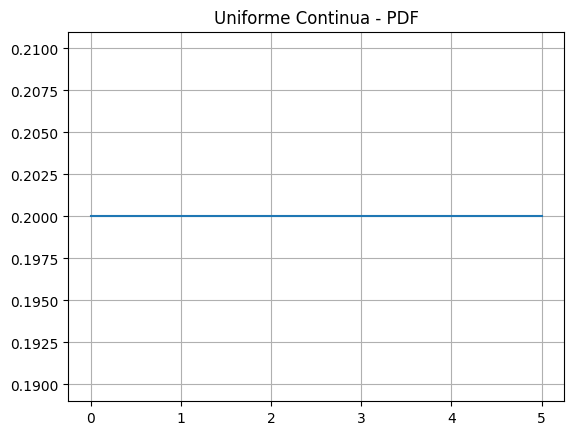

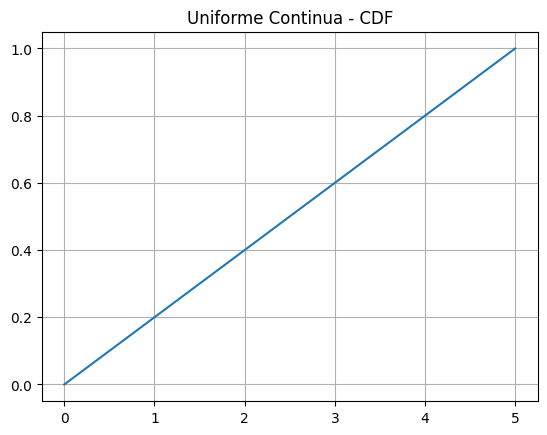

In [5]:
a,b = 0,5
x = np.linspace(a,b,500)

plt.plot(x, uniform.pdf(x,loc=a,scale=b-a))
plt.title("Uniforme Continua - PDF")
plt.grid()
plt.show()

plt.plot(x, uniform.cdf(x,loc=a,scale=b-a))
plt.title("Uniforme Continua - CDF")
plt.grid()
plt.show()

#  Distribución Triangular

Parámetros: $a<c<b$

### Media
$$
E(X)=\dfrac{a+b+c}{3}
$$

### Varianza
$$
Var(X)=\dfrac{a^2+b^2+c^2-ab-ac-bc}{18}
$$

### Simulación

Si $U\sim U(0,1)$:

$$
X=
\begin{cases}
a+\sqrt{U(b-a)(c-a)}, & U<\dfrac{c-a}{b-a} \\
b-\sqrt{(1-U)(b-a)(b-c)}, & \text{en otro caso}
\end{cases}
$$

### Pseudocódigo – Triangular

1. Generar U ~ U(0,1)
2. Si U < (c-a)/(b-a):
       X = a + sqrt(U*(b-a)*(c-a))
   En otro caso:
       X = b - sqrt((1-U)*(b-a)*(b-c))
3. Retornar X

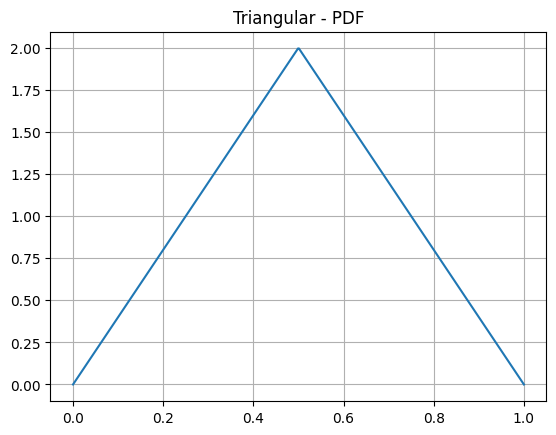

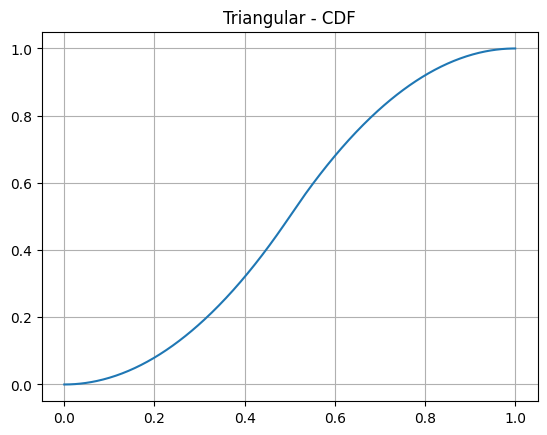

In [6]:
c = 0.5
x = np.linspace(0,1,500)

plt.plot(x, triang.pdf(x,c))
plt.title("Triangular - PDF")
plt.grid()
plt.show()

plt.plot(x, triang.cdf(x,c))
plt.title("Triangular - CDF")
plt.grid()
plt.show()

# Distribución Exponencial

$$
X \sim Exp(\lambda), \quad \lambda>0
$$

### PDF
$$
f(x)=\lambda e^{-\lambda x}, \quad x\ge0
$$

### CDF
$$
F(x)=1-e^{-\lambda x}
$$

### Media
$$
E(X)=\dfrac{1}{\lambda}
$$

### Varianza
$$
Var(X)=\dfrac{1}{\lambda^2}
$$

### Simulación (inversa)
$$
X=-\dfrac{\ln(1-U)}{\lambda}
$$

###  Pseudocódigo – Exponencial

1. Generar U ~ U(0,1)
2. X = - ln(1-U) / λ
3. Retornar X

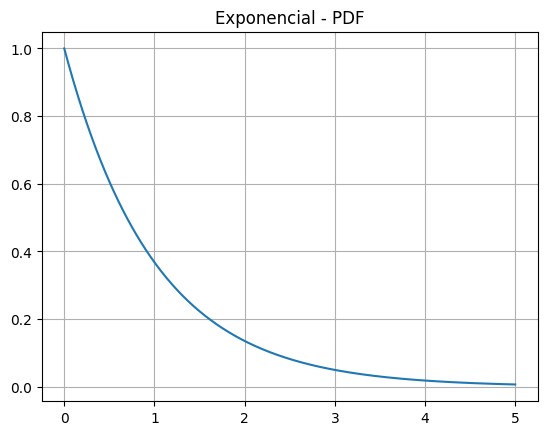

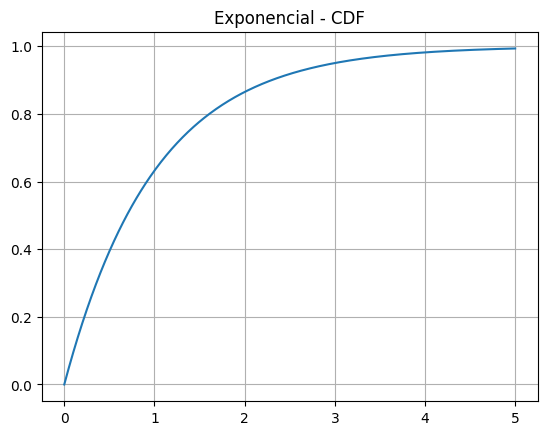

In [7]:
x = np.linspace(0,5,500)

plt.plot(x, expon.pdf(x))
plt.title("Exponencial - PDF")
plt.grid()
plt.show()

plt.plot(x, expon.cdf(x))
plt.title("Exponencial - CDF")
plt.grid()
plt.show()

# Distribución Erlang

$$
X \sim Erlang(k,\lambda)
$$

### Media
$$
E(X)=\dfrac{k}{\lambda}
$$

### Varianza
$$
Var(X)=\dfrac{k}{\lambda^2}
$$

### Simulación
Si $U_i \sim U(0,1)$:

$$
X=-\dfrac{1}{\lambda}\ln\left(\prod_{i=1}^{k} U_i\right)
$$

###  Pseudocódigo – m-Erlang

1. Inicializar producto = 1
2. Para i = 1 hasta k:
       Generar U_i ~ U(0,1)
       producto = producto * U_i
3. X = - (1/λ) * ln(producto)
4. Retornar X


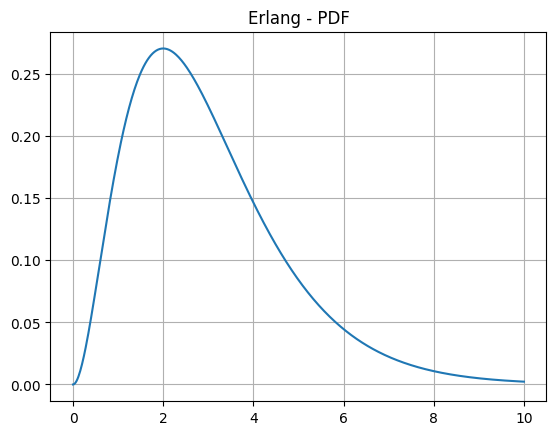

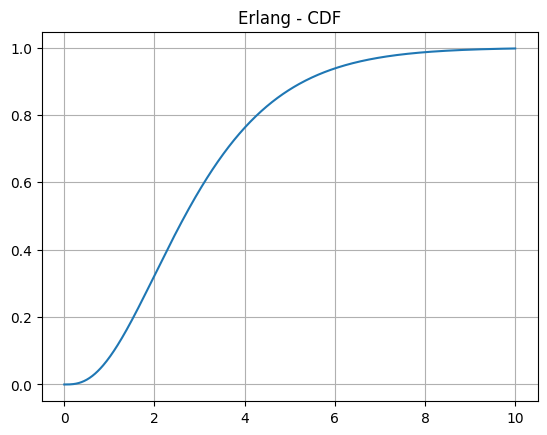

In [8]:
x = np.linspace(0,10,500)

plt.plot(x, erlang.pdf(x,a=3))
plt.title("Erlang - PDF")
plt.grid()
plt.show()

plt.plot(x, erlang.cdf(x,a=3))
plt.title("Erlang - CDF")
plt.grid()
plt.show()

#  Distribución Gamma

$$
X \sim \Gamma(\alpha,\lambda)
$$

### PDF
$$
f(x)=\dfrac{\lambda^\alpha x^{\alpha-1} e^{-\lambda x}}{\Gamma(\alpha)}
$$

### Media
$$
E(X)=\dfrac{\alpha}{\lambda}
$$

### Varianza
$$
Var(X)=\dfrac{\alpha}{\lambda^2}
$$

### Simulación

Si $\alpha$ es entero:

1. Generar $U_1,\dots,U_\alpha \sim U(0,1)$  
2. Calcular:

$$
X=-\dfrac{1}{\lambda}
\ln\left(\prod_{i=1}^{\alpha} U_i\right)
$$

Si $\alpha$ no es entero, se usa el método de aceptación–rechazo.

###  Pseudocódigo – Gamma

Si α es entero:
    Usar método Erlang

Si α no es entero:
    Usar método aceptación-rechazo

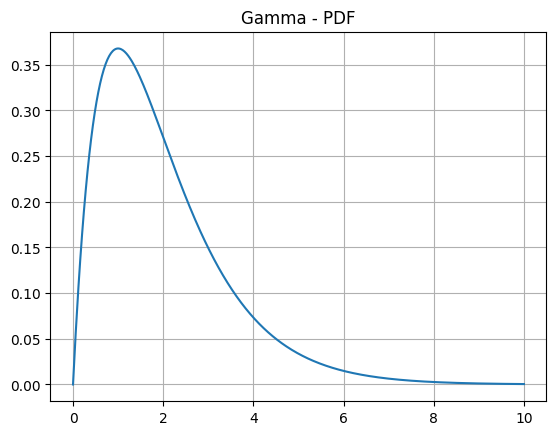

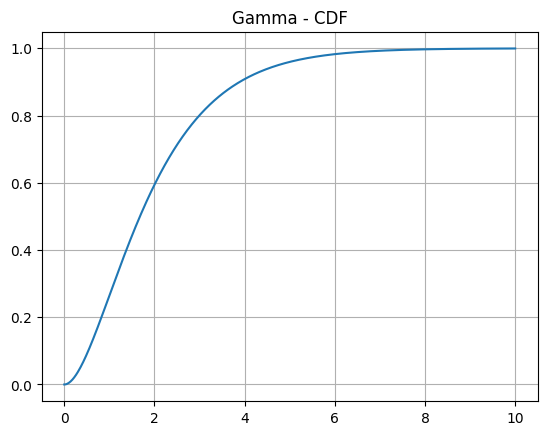

In [9]:
x = np.linspace(0,10,500)

plt.plot(x, gamma.pdf(x,a=2))
plt.title("Gamma - PDF")
plt.grid()
plt.show()

plt.plot(x, gamma.cdf(x,a=2))
plt.title("Gamma - CDF")
plt.grid()
plt.show()

#  Distribución Weibull

Sea:

$$
X \sim Weibull(k,\lambda)
$$

donde:
- $k>0$ es el parámetro de forma  
- $\lambda>0$ es el parámetro de escala  



### Función de densidad (PDF)

$$
f(x)=
\frac{k}{\lambda}
\left(\frac{x}{\lambda}\right)^{k-1}
e^{-(x/\lambda)^k},
\quad x \ge 0
$$



### Función de distribución acumulada (CDF)

$$
F(x)=
1-e^{-(x/\lambda)^k},
\quad x \ge 0
$$



### Media

$$
E(X)=
\lambda \,
\Gamma\left(1+\frac{1}{k}\right)
$$



###  Varianza

$$
Var(X)=
\lambda^2
\left[
\Gamma\left(1+\frac{2}{k}\right)
-
\left(
\Gamma\left(1+\frac{1}{k}\right)
\right)^2
\right]
$$



### Simulación (método inversa)

Si $U \sim U(0,1)$:

$$
X=
\lambda
\left[-\ln(1-U)\right]^{1/k}
$$

###  Pseudocódigo – Weibull

1. Generar U ~ U(0,1)
2. X = λ * [ -ln(1-U) ]^(1/k)
3. Retornar X

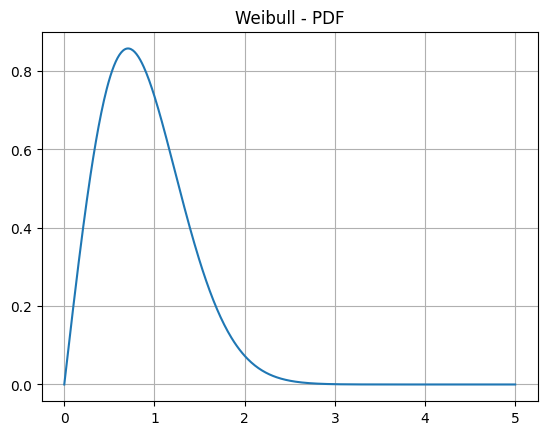

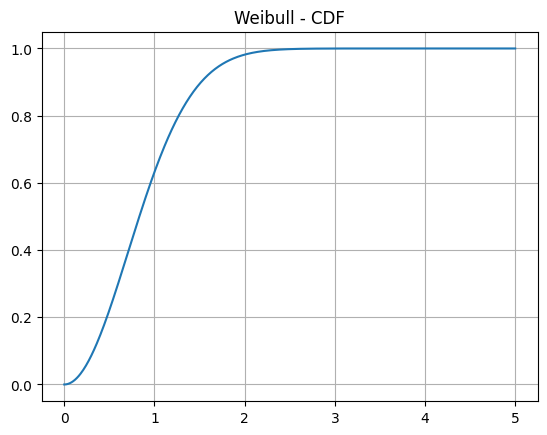

In [10]:
x = np.linspace(0,5,500)

plt.plot(x, weibull_min.pdf(x,2))
plt.title("Weibull - PDF")
plt.grid()
plt.show()

plt.plot(x, weibull_min.cdf(x,2))
plt.title("Weibull - CDF")
plt.grid()
plt.show()

# Distribución Normal

$$
X \sim N(\mu,\sigma^2)
$$

### PDF
$$
f(x)=\dfrac{1}{\sigma\sqrt{2\pi}}
e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

### Media
$$
E(X)=\mu
$$

### Varianza
$$
Var(X)=\sigma^2
$$

### Método Box-Muller
$$
Z=\sqrt{-2\ln U_1}\cos(2\pi U_2)
$$

$$
X=\mu+\sigma Z
$$

### Simulación (Método Box–Muller)

1. Generar $U_1, U_2 \sim U(0,1)$ independientes.

2. Calcular:

$$
Z=\sqrt{-2\ln(U_1)}\cos(2\pi U_2)
$$

Entonces:

$$
X=\mu+\sigma Z
$$

donde $X \sim N(\mu,\sigma^2)$.

###  Pseudocódigo – Normal (Box-Muller)

1. Generar U1, U2 ~ U(0,1)
2. Z = sqrt(-2 ln(U1)) * cos(2πU2)
3. X = μ + σZ
4. Retornar X

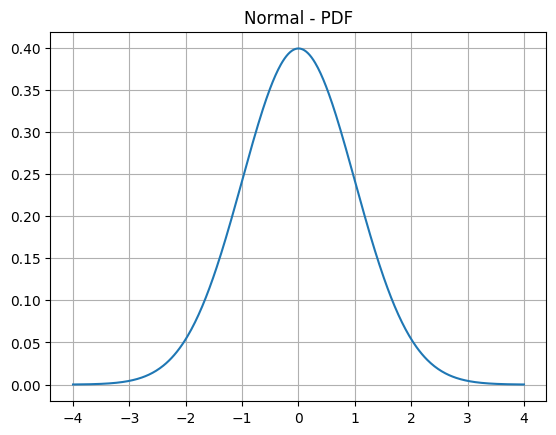

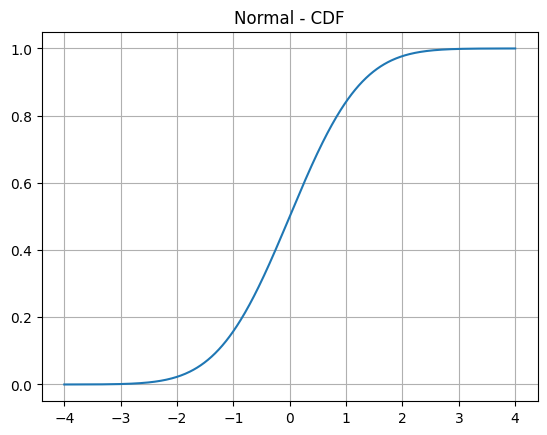

In [11]:
x = np.linspace(-4,4,500)

plt.plot(x, norm.pdf(x))
plt.title("Normal - PDF")
plt.grid()
plt.show()

plt.plot(x, norm.cdf(x))
plt.title("Normal - CDF")
plt.grid()
plt.show()

#  Distribución Log-normal

Sea:

$$
X \sim LogNormal(\mu,\sigma^2)
$$

si y solo si:

$$
\ln(X) \sim N(\mu,\sigma^2)
$$

donde:
- $\mu \in \mathbb{R}$
- $\sigma > 0$



###  Soporte

$$
x>0
$$


### Función de densidad (PDF)

$$
f(x)=
\dfrac{1}
{x\sigma\sqrt{2\pi}}
\exp\left(
-\dfrac{(\ln x - \mu)^2}{2\sigma^2}
\right),
\quad x>0
$$



### Función de distribución acumulada (CDF)

$$
F(x)=
\Phi
\left(
\dfrac{\ln x - \mu}{\sigma}
\right)
$$

donde $\Phi(\cdot)$ es la función de distribución acumulada de la normal estándar.



###  Media

$$
E(X)=
e^{\mu+\frac{\sigma^2}{2}}
$$



###  Varianza

$$
Var(X)=
\left(e^{\sigma^2}-1\right)
e^{2\mu+\sigma^2}
$$

### Mediana

$$
\text{Mediana}=e^{\mu}
$$



###  Moda

$$
\text{Moda}=e^{\mu-\sigma^2}
$$



###  Simulación

1. Generar $Z \sim N(\mu,\sigma^2)$  
2. Calcular:

$$
X=e^Z
$$

### Pseudocódigo – Log-normal

1. Generar Z ~ N(μ,σ²)
2. X = e^Z
3. Retornar X

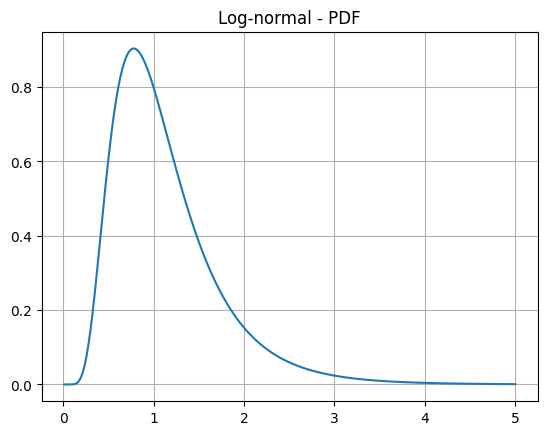

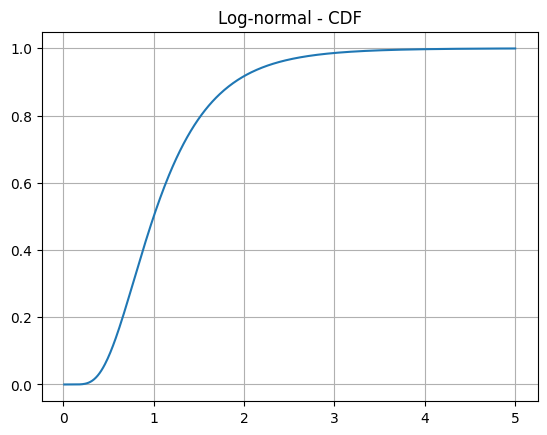

In [12]:
x = np.linspace(0.01,5,500)

plt.plot(x, lognorm.pdf(x,s=0.5))
plt.title("Log-normal - PDF")
plt.grid()
plt.show()

plt.plot(x, lognorm.cdf(x,s=0.5))
plt.title("Log-normal - CDF")
plt.grid()
plt.show()

# Distribución Beta

$$
X \sim Beta(\alpha,\beta)
$$

### PDF
$$
f(x)=\dfrac{x^{\alpha-1}(1-x)^{\beta-1}}
{B(\alpha,\beta)}
$$

### Media
$$
E(X)=\dfrac{\alpha}{\alpha+\beta}
$$

### Varianza
$$
Var(X)=
\dfrac{\alpha\beta}
{(\alpha+\beta)^2(\alpha+\beta+1)}
$$

### Simulación

1. Generar $Y_1 \sim \Gamma(\alpha,1)$  
2. Generar $Y_2 \sim \Gamma(\beta,1)$  
3. Calcular:

$$
X=\dfrac{Y_1}{Y_1+Y_2}
$$

###  Pseudocódigo – Beta

1. Generar Y1 ~ Gamma(α,1)
2. Generar Y2 ~ Gamma(β,1)
3. X = Y1 / (Y1 + Y2)
4. Retornar X

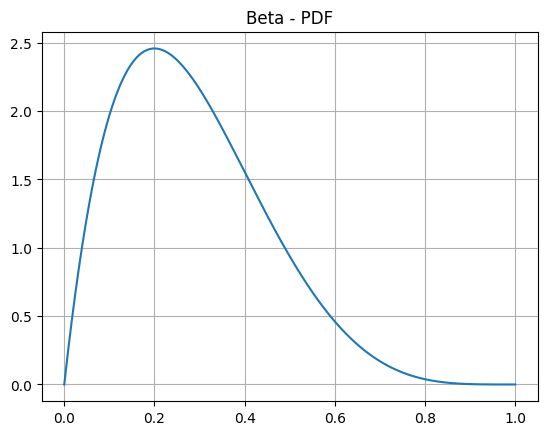

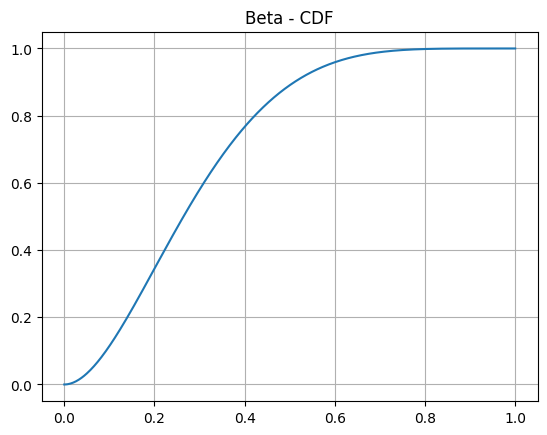

In [13]:
x = np.linspace(0,1,500)

plt.plot(x, beta.pdf(x,2,5))
plt.title("Beta - PDF")
plt.grid()
plt.show()

plt.plot(x, beta.cdf(x,2,5))
plt.title("Beta - CDF")
plt.grid()
plt.show()

# Distribución Uniforme Discreta

Valores: $a,a+1,\dots,b$

### Media
$$
E(X)=\dfrac{a+b}{2}
$$

### Varianza
$$
Var(X)=\dfrac{(b-a+1)^2-1}{12}
$$

### Simulación

Si $U \sim U(0,1)$:

$$
X=\lfloor U(b-a+1) \rfloor + a
$$

### Pseudocódigo – Uniforme Discreta

1. Generar U ~ U(0,1)
2. X = floor(U*(b-a+1)) + a
3. Retornar X

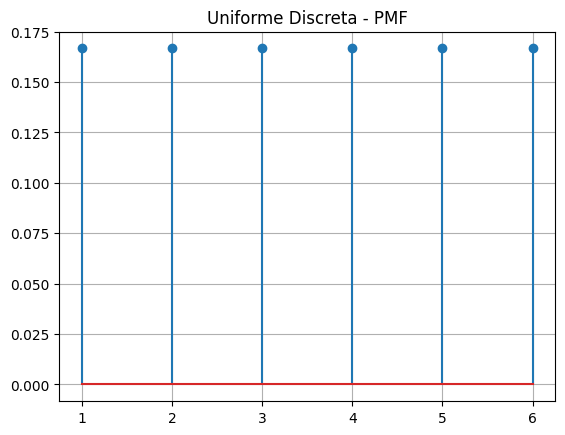

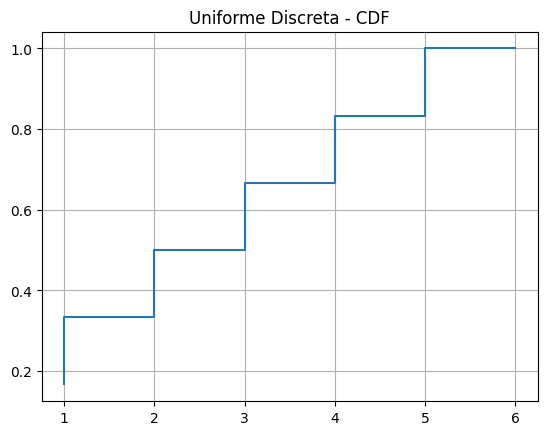

In [14]:
x = np.arange(1,7)

plt.stem(x, randint.pmf(x,1,7))
plt.title("Uniforme Discreta - PMF")
plt.grid()
plt.show()

plt.step(x, randint.cdf(x,1,7))
plt.title("Uniforme Discreta - CDF")
plt.grid()
plt.show()

# Distribución Bernoulli

$$
X \sim Bernoulli(p)
$$

### PMF
$$
P(X=x)=p^x(1-p)^{1-x}, \quad x=0,1
$$

### Media
$$
E(X)=p
$$

### Varianza
$$
Var(X)=p(1-p)
$$

###  Simulación

1. Generar $U \sim U(0,1)$.

2. Definir:

$$
X=
\begin{cases}
1, & U<p \\
0, & U\ge p
\end{cases}
$$

Entonces:

$$
X \sim Bernoulli(p)
$$

### Pseudocódigo – Bernoulli

1. Generar U ~ U(0,1)
2. Si U < p:
       X = 1
   En otro caso:
       X = 0
3. Retornar X

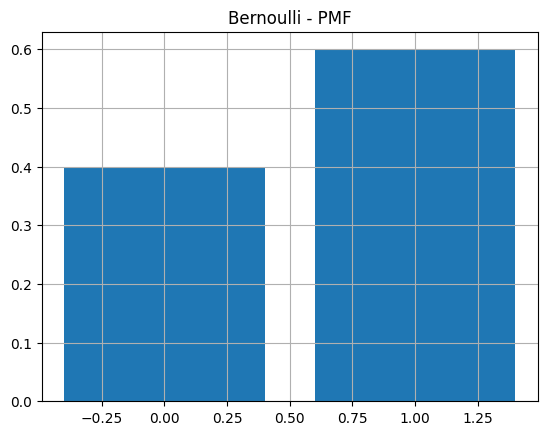

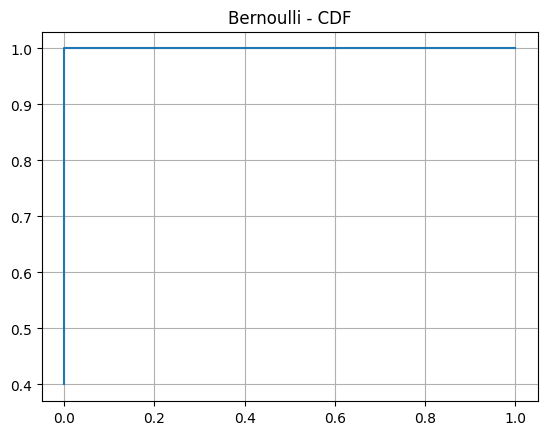

In [15]:
x = [0,1]

plt.bar(x, bernoulli.pmf(x,0.6))
plt.title("Bernoulli - PMF")
plt.grid()
plt.show()

plt.step(x, bernoulli.cdf(x,0.6))
plt.title("Bernoulli - CDF")
plt.grid()
plt.show()

# Distribución Geométrica

$$
X \sim Geom(p)
$$

### PMF
$$
P(X=k)=(1-p)^{k-1}p
$$

### Media
$$
E(X)=\dfrac{1}{p}
$$

### Varianza
$$
Var(X)=\dfrac{1-p}{p^2}
$$

###  Simulación (método inversa)

Si $U \sim U(0,1)$:

$$
X=
\left\lceil
\dfrac{\ln(1-U)}{\ln(1-p)}
\right\rceil
$$

### Pseudocódigo – Geométrica

1. Generar U ~ U(0,1)
2. X = ceil( ln(1-U) / ln(1-p) )
3. Retornar X

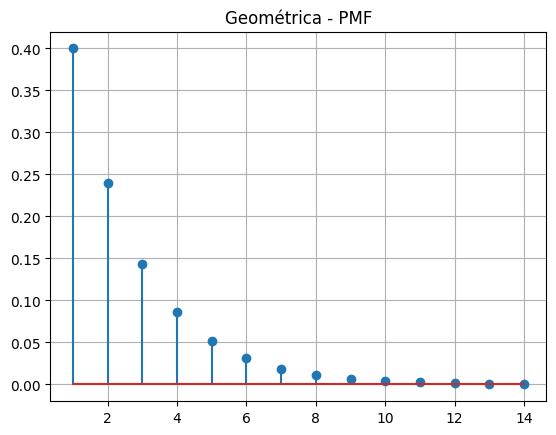

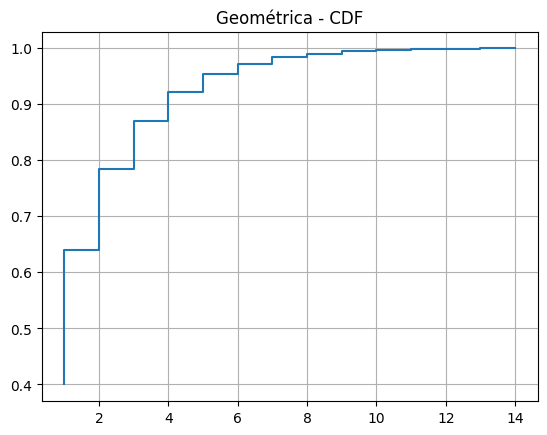

In [16]:
x = np.arange(1,15)

plt.stem(x, geom.pmf(x,0.4))
plt.title("Geométrica - PMF")
plt.grid()
plt.show()

plt.step(x, geom.cdf(x,0.4))
plt.title("Geométrica - CDF")
plt.grid()
plt.show()

# Distribución Binomial Negativa

$$
X \sim NB(r,p)
$$

### PMF
$$
P(X=k)=
\binom{k-1}{r-1}
p^r(1-p)^{k-r}
$$

### Media
$$
E(X)=\dfrac{r}{p}
$$

### Varianza
$$
Var(X)=\dfrac{r(1-p)}{p^2}
$$

###  Simulación

1. Inicializar $x=0$, éxitos$=0$  
2. Mientras éxitos < r:
   - Generar $U \sim U(0,1)$
   - Si $U<p$, éxitos++
   - x++
3. Retornar $x$

###  Pseudocódigo – Binomial Negativa

1. Inicializar éxitos = 0, intentos = 0
2. Mientras éxitos < r:
       Generar U ~ U(0,1)
       intentos++
       Si U < p:
            éxitos++
3. Retornar intentos

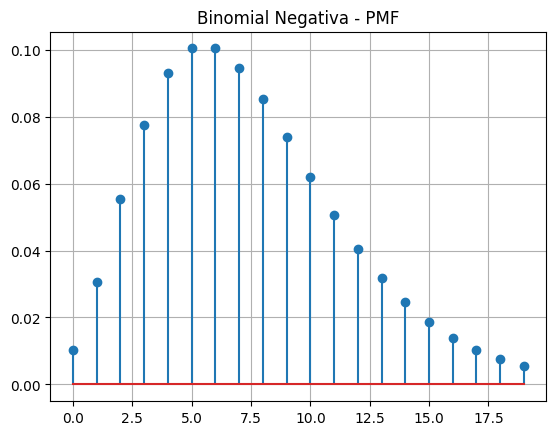

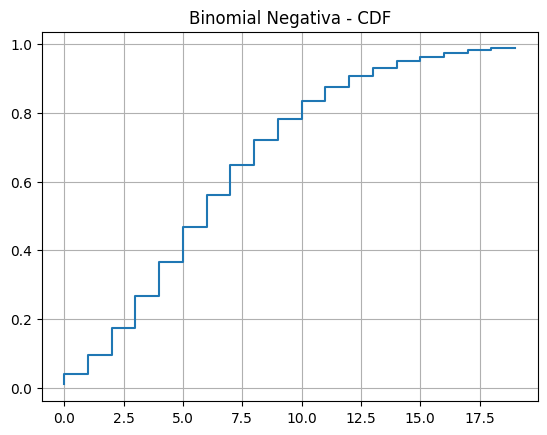

In [17]:
x = np.arange(0,20)

plt.stem(x, nbinom.pmf(x,5,0.4))
plt.title("Binomial Negativa - PMF")
plt.grid()
plt.show()

plt.step(x, nbinom.cdf(x,5,0.4))
plt.title("Binomial Negativa - CDF")
plt.grid()
plt.show()

# Distribución de Poisson

$$
X \sim Poisson(\lambda)
$$

### PMF
$$
P(X=k)=
\dfrac{\lambda^k e^{-\lambda}}{k!}
$$

### Media
$$
E(X)=\lambda
$$

### Varianza
$$
Var(X)=\lambda
$$

### Método de Knuth

Sea $L=e^{-\lambda}$

Multiplicar uniformes hasta que:

$$
\prod U_i < L
$$

El resultado es:

$$
X=k-1
$$

### Simulación (Método de Knuth)

Sea $L=e^{-\lambda}$.

1. Inicializar:
   $k=0$, $p=1$

2. Mientras $p>L$:
   - Generar $U \sim U(0,1)$
   - $p=p\cdot U$
   - $k=k+1$

3. Retornar:

$$
X=k-1
$$

### Pseudocódigo – Poisson

1. L = e^(-λ)
2. k = 0
3. p = 1
4. Mientras p > L:
       Generar U ~ U(0,1)
       p = p * U
       k++
5. Retornar k - 1

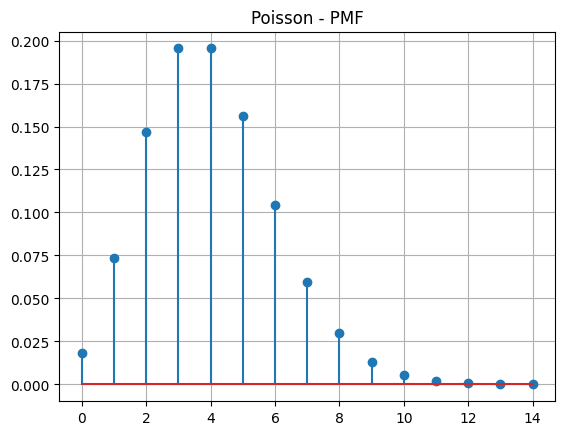

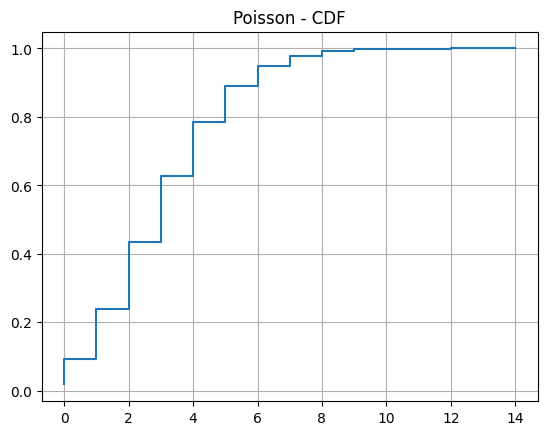

In [18]:
x = np.arange(0,15)

plt.stem(x, poisson.pmf(x,4))
plt.title("Poisson - PMF")
plt.grid()
plt.show()

plt.step(x, poisson.cdf(x,4))
plt.title("Poisson - CDF")
plt.grid()
plt.show()

# Distribución t de Student

Sea:

$$
X \sim t(\nu)
$$

donde $\nu > 0$ son los grados de libertad.



### Función de densidad (PDF)

$$
f(x)=
\dfrac{\Gamma\left(\frac{\nu+1}{2}\right)}
{\sqrt{\nu\pi}\,\Gamma\left(\frac{\nu}{2}\right)}
\left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}},
\quad -\infty < x < \infty
$$



### Función de distribución acumulada (CDF)

No tiene forma cerrada elemental, pero puede expresarse como:

$$
F(x)=
\frac{1}{2}
+
x \,
\frac{\Gamma\left(\frac{\nu+1}{2}\right)}
{\sqrt{\nu\pi}\,\Gamma\left(\frac{\nu}{2}\right)}
\,{}_2F_1
\left(
\frac{1}{2},\frac{\nu+1}{2};
\frac{3}{2};
-\frac{x^2}{\nu}
\right)
$$

(donde ${}_2F_1$ es la función hipergeométrica).

En práctica se calcula numéricamente.



### Media

$$
E(X)=0 \quad \text{si } \nu>1
$$



### Varianza

$$
Var(X)=\dfrac{\nu}{\nu-2},
\quad \text{si } \nu>2
$$



###  Relación importante

Si:

$$
Z \sim N(0,1)
$$

y

$$
V \sim \chi^2(\nu)
$$


independientes, entonces

$$
T=\dfrac{Z}{\sqrt{V/\nu}}
$$

tiene distribución $t(\nu)$.

###  Simulación

1. Generar $Z \sim N(0,1)$  
2. Generar $V \sim \chi^2(\nu)$  
3. Calcular:

$$
T=\dfrac{Z}{\sqrt{V/\nu}}

$$

### Pseudocódigo – t-Student

1. Generar Z ~ N(0,1)
2. Generar V ~ Chi-cuadrada(ν)
3. T = Z / sqrt(V/ν)
4. Retornar T

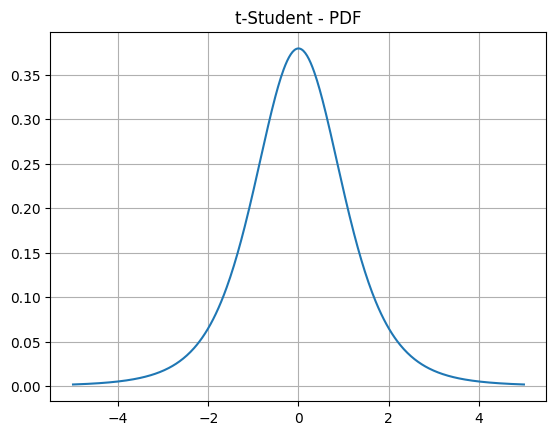

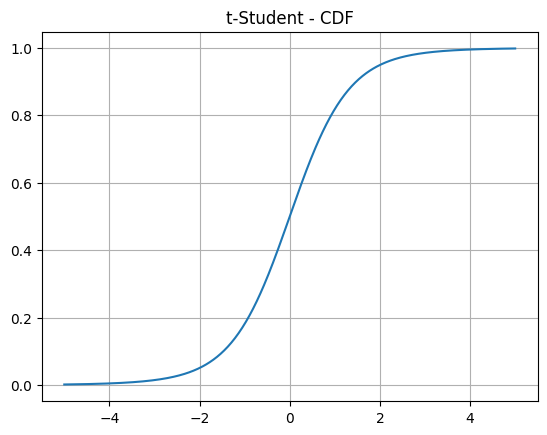

In [19]:
x = np.linspace(-5,5,500)

plt.plot(x, t.pdf(x,5))
plt.title("t-Student - PDF")
plt.grid()
plt.show()

plt.plot(x, t.cdf(x,5))
plt.title("t-Student - CDF")
plt.grid()
plt.show()

# Distribución Chi-cuadrada

Sea:

$$
X \sim \chi^2(\nu)
$$

donde $\nu>0$ son los grados de libertad.



### Función de densidad (PDF)

$$
f(x)=
\dfrac{1}
{2^{\nu/2}\Gamma\left(\frac{\nu}{2}\right)}
x^{\frac{\nu}{2}-1}
e^{-x/2},
\quad x>0
$$



### Función de distribución acumulada (CDF)

$$
F(x)=
\dfrac{
\gamma\left(\frac{\nu}{2},\frac{x}{2}\right)
}
{\Gamma\left(\frac{\nu}{2}\right)}
$$

donde $\gamma(\cdot)$ es la gamma incompleta inferior.



### Media

$$
E(X)=\nu
$$



###  Varianza

$$
Var(X)=2\nu
$$



###  Relación importante

Si:

$$
Z_1,\dots,Z_\nu \sim N(0,1)
$$

independientes, entonces:

$$
X=\sum_{i=1}^{\nu} Z_i^2
$$

tiene distribución $\chi^2(\nu)$.

###  Simulación

1. Generar $Z_1,\dots,Z_\nu \sim N(0,1)$  
2. Calcular:

$$
X=\sum_{i=1}^{\nu} Z_i^2
$$

###  Pseudocódigo – Chi-cuadrada

1. Generar Z1,...,Zν ~ N(0,1)
2. X = Σ Zi²
3. Retornar X

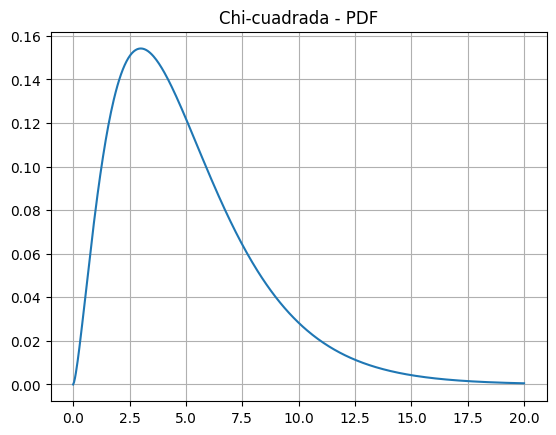

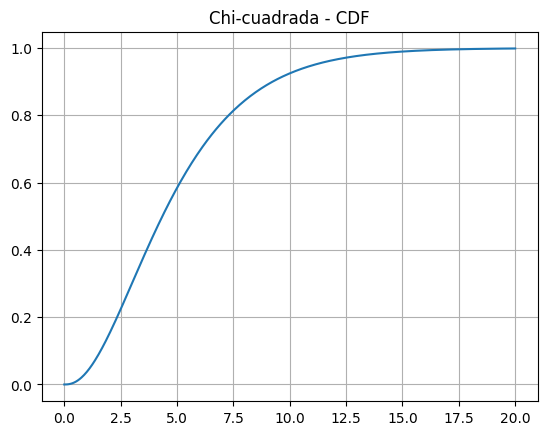

In [20]:
x = np.linspace(0,20,500)

plt.plot(x, chi2.pdf(x,5))
plt.title("Chi-cuadrada - PDF")
plt.grid()
plt.show()

plt.plot(x, chi2.cdf(x,5))
plt.title("Chi-cuadrada - CDF")
plt.grid()
plt.show()

# Distribución F de Fisher–Snedecor

Sea:

$$
X \sim F(\nu_1,\nu_2)
$$

donde:
- $\nu_1$ = grados de libertad del numerador
- $\nu_2$ = grados de libertad del denominador
- $\nu_1, \nu_2 > 0$



### Definición

Si:

$$
U \sim \chi^2(\nu_1), \quad
V \sim \chi^2(\nu_2)
$$

independientes, entonces:

$$
X = \frac{U/\nu_1}{V/\nu_2}
$$

tiene distribución $F(\nu_1,\nu_2)$.



###  Función de densidad (PDF)

$$
f(x)=
\dfrac{
\left(\dfrac{\nu_1}{\nu_2}\right)^{\nu_1/2}
x^{\frac{\nu_1}{2}-1}
}
{
B\left(\frac{\nu_1}{2},\frac{\nu_2}{2}\right)
\left(1+\dfrac{\nu_1}{\nu_2}x\right)^{\frac{\nu_1+\nu_2}{2}}
},
\quad x>0
$$

donde $B(\cdot,\cdot)$ es la función Beta.



###  Función de distribución acumulada (CDF)

$$
F(x)=
I_{\frac{\nu_1 x}{\nu_1 x+\nu_2}}
\left(\frac{\nu_1}{2},\frac{\nu_2}{2}\right)
$$

donde $I_z(a,b)$ es la beta incompleta regularizada.



###  Media

$$
E(X)=
\dfrac{\nu_2}{\nu_2-2},
\quad \text{si } \nu_2>2
$$



###  Varianza

$$
Var(X)=
\dfrac{
2\nu_2^2(\nu_1+\nu_2-2)
}
{
\nu_1(\nu_2-2)^2(\nu_2-4)
},
\quad \text{si } \nu_2>4
$$



###  Propiedad importante

La distribución F es asimétrica positiva y se usa en:

- Análisis de varianza (ANOVA)
- Pruebas de hipótesis sobre varianzas
- Regresión lineal (estadístico global)

### Simulación

1. Generar $U \sim \chi^2(\nu_1)$  
2. Generar $V \sim \chi^2(\nu_2)$  
3. Calcular:

$$
X=\dfrac{U/\nu_1}{V/\nu_2}
$$

### Pseudocódigo – F de Fisher

1. Generar U ~ Chi-cuadrada(ν1)
2. Generar V ~ Chi-cuadrada(ν2)
3. X = (U/ν1) / (V/ν2)
4. Retornar X

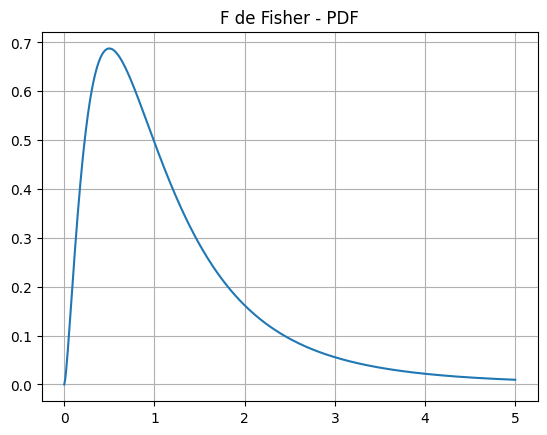

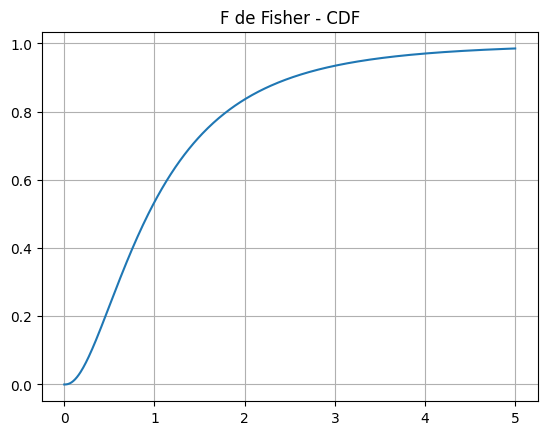

In [21]:
x = np.linspace(0,5,500)

plt.plot(x, f.pdf(x,5,10))
plt.title("F de Fisher - PDF")
plt.grid()
plt.show()

plt.plot(x, f.cdf(x,5,10))
plt.title("F de Fisher - CDF")
plt.grid()
plt.show()

#  Distribución Log-logística

Sea:

$$
X \sim LogLogística(\alpha,\beta)
$$

donde:
- $\alpha>0$ es el parámetro de escala  
- $\beta>0$ es el parámetro de forma  



###  Función de densidad (PDF)

$$
f(x)=
\dfrac{\beta}{\alpha}
\left(\dfrac{x}{\alpha}\right)^{\beta-1}
\left[
1+\left(\dfrac{x}{\alpha}\right)^\beta
\right]^{-2},
\quad x>0
$$



###  Función de distribución acumulada (CDF)

$$
F(x)=
\dfrac{
\left(\dfrac{x}{\alpha}\right)^\beta
}
{
1+\left(\dfrac{x}{\alpha}\right)^\beta
},
\quad x>0
$$



###  Media

Existe si $\beta>1$:

$$
E(X)=
\alpha
\frac{\pi/\beta}
{\sin\left(\pi/\beta\right)}
$$



###  Varianza

Existe si $\beta>2$:

$$
Var(X)=
\alpha^2
\left[
\frac{2\pi/\beta}
{\sin\left(2\pi/\beta\right)}
-
\left(
\frac{\pi/\beta}
{\sin\left(\pi/\beta\right)}
\right)^2
\right]
$$



### Simulación (método inversa)

Si $U \sim U(0,1)$:

$$
X=
\alpha
\left(
\dfrac{U}{1-U}
\right)^{1/\beta}
$$

### Pseudocódigo – Log-logística

1. Generar U ~ U(0,1)
2. X = α * ( U / (1-U) )^(1/β)
3. Retornar X

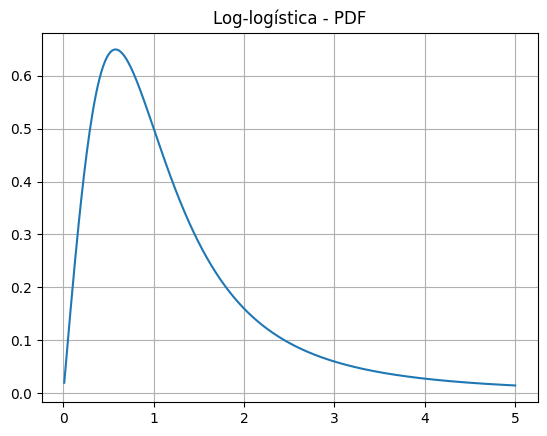

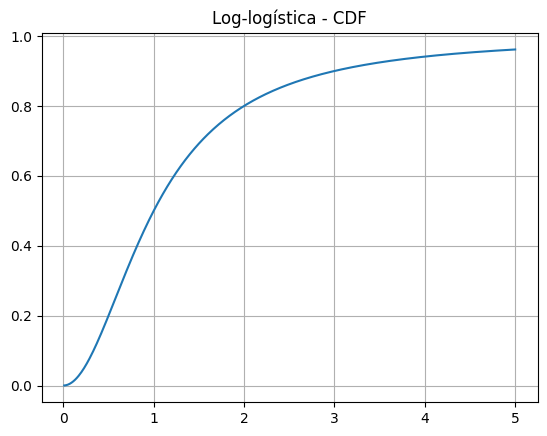

In [22]:
x = np.linspace(0.01,5,500)

plt.plot(x, fisk.pdf(x,2))
plt.title("Log-logística - PDF")
plt.grid()
plt.show()

plt.plot(x, fisk.cdf(x,2))
plt.title("Log-logística - CDF")
plt.grid()
plt.show()

#  Distribución Johnson SU

Sea:

$$
X \sim JohnsonSU(\gamma,\delta,\xi,\lambda)
$$

donde:
- $\gamma \in \mathbb{R}$
- $\delta>0$
- $\xi \in \mathbb{R}$
- $\lambda>0$



###  Definición

Si:

$$
Z \sim N(0,1)
$$

entonces:

$$
X=
\xi+\lambda
\sinh\left(
\dfrac{Z-\gamma}{\delta}
\right)
$$



###  Función de densidad (PDF)

$$
f(x)=
\dfrac{
\delta
}
{
\lambda\sqrt{2\pi}
\sqrt{1+\left(\dfrac{x-\xi}{\lambda}\right)^2}
}
\exp
\left[
-\frac{1}{2}
\left(
\gamma+
\delta
\sinh^{-1}
\left(
\dfrac{x-\xi}{\lambda}
\right)
\right)^2
\right]
$$



### Función de distribución acumulada (CDF)

$$
F(x)=
\Phi
\left(
\gamma+
\delta
\sinh^{-1}
\left(
\dfrac{x-\xi}{\lambda}
\right)
\right)
$$

donde $\Phi(\cdot)$ es la CDF de la normal estándar.



###  Media y Varianza

No tienen forma simple cerrada.  
Se calculan numéricamente o mediante momentos transformados de la normal.



###  Simulación

1. Generar $Z \sim N(0,1)$  
2. Calcular:

$$
X=
\xi+\lambda
\sinh\left(
\dfrac{Z-\gamma}{\delta}
\right)
$$

###  Pseudocódigo – Johnson SU

1. Generar Z ~ N(0,1)
2. X = ξ + λ * sinh( (Z - γ) / δ )
3. Retornar X

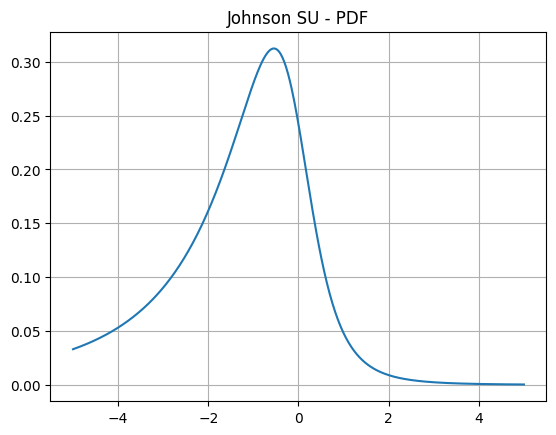

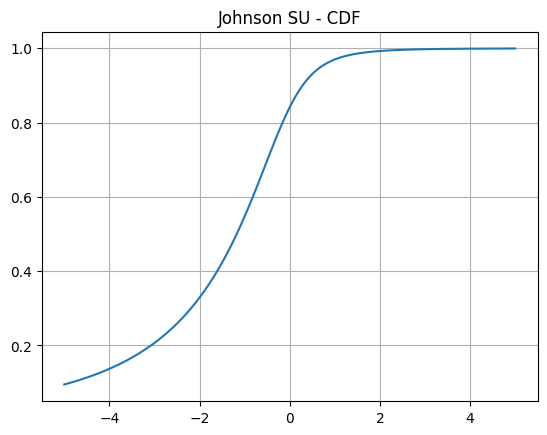

In [23]:
x = np.linspace(-5,5,500)

plt.plot(x, johnsonsu.pdf(x,1,1))
plt.title("Johnson SU - PDF")
plt.grid()
plt.show()

plt.plot(x, johnsonsu.cdf(x,1,1))
plt.title("Johnson SU - CDF")
plt.grid()
plt.show()

#  Distribución Binomial

Sea:

$$
X \sim Binomial(n,p)
$$

donde:
- $n \in \mathbb{N}$
- $0<p<1$



###  Soporte

$$
x=0,1,2,\dots,n
$$



###  Función de masa de probabilidad (PMF)

$$
P(X=x)=
\binom{n}{x}
p^x(1-p)^{n-x}
$$



### Función de distribución acumulada (CDF)

$$
F(x)=
\sum_{k=0}^{\lfloor x \rfloor}
\binom{n}{k}
p^k(1-p)^{n-k}
$$



### Media

$$
E(X)=np
$$



###  Varianza

$$
Var(X)=np(1-p)
$$



###  Simulación

1. Inicializar $X=0$  
2. Repetir $n$ veces:
   - Generar $U \sim U(0,1)$
   - Si $U<p$, sumar 1 a $X$
3. Retornar $X$

###  Pseudocódigo – Binomial

1. Inicializar X = 0
2. Repetir n veces:
       Generar U ~ U(0,1)
       Si U < p:
            X++
3. Retornar X

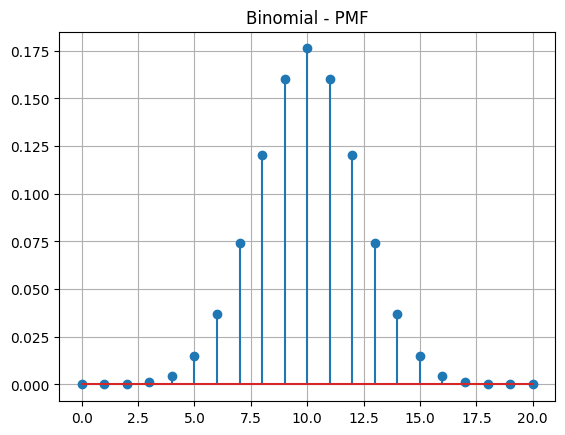

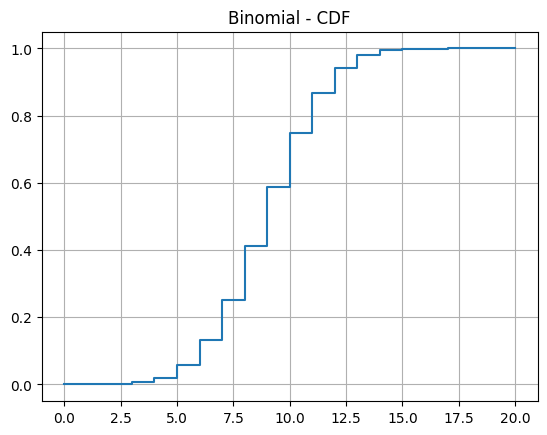

In [24]:
# Binomial
x = np.arange(0,21)

plt.stem(x, binom.pmf(x,20,0.5))
plt.title("Binomial - PMF")
plt.grid()
plt.show()

plt.step(x, binom.cdf(x,20,0.5))
plt.title("Binomial - CDF")
plt.grid()
plt.show()

#  Distribución Hipergeométrica

Sea:

$$
X \sim Hipergeométrica(N,K,n)
$$

donde:
- $N$ = tamaño de la población  
- $K$ = número de éxitos en la población  
- $n$ = tamaño de la muestra  



### Soporte

$$
x=\max(0,n-(N-K)),\dots,\min(n,K)
$$



###  Función de masa de probabilidad (PMF)

$$
P(X=x)=
\dfrac{
\binom{K}{x}
\binom{N-K}{n-x}
}
{
\binom{N}{n}
}
$$



###  Función de distribución acumulada (CDF)

$$
F(x)=
\sum_{k=\text{mín}}^{\lfloor x \rfloor}
\dfrac{
\binom{K}{k}
\binom{N-K}{n-k}
}
{
\binom{N}{n}
}
$$



###  Media

$$
E(X)=
n\frac{K}{N}
$$



###  Varianza

$$
Var(X)=
n\frac{K}{N}
\left(1-\frac{K}{N}\right)
\frac{N-n}{N-1}
$$



###  Nota importante

Se diferencia de la binomial porque el muestreo es **sin reemplazo**.

###  Simulación

Se simula extrayendo $n$ elementos sin reemplazo de una población con $K$ éxitos y $N-K$ fracasos, contando el número de éxitos obtenidos.

###  Pseudocódigo – Hipergeométrica

1. Crear población con K éxitos y N-K fracasos
2. Extraer n elementos sin reemplazo
3. Contar número de éxitos obtenidos
4. Retornar X

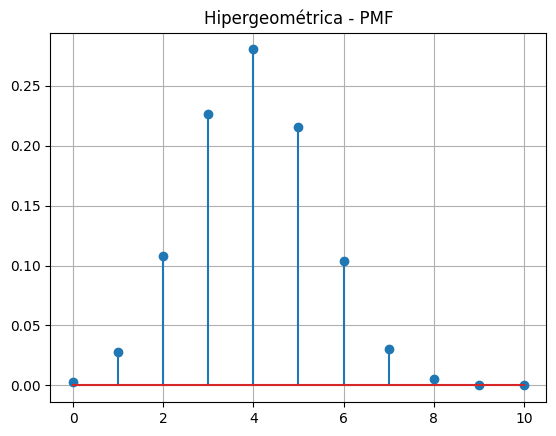

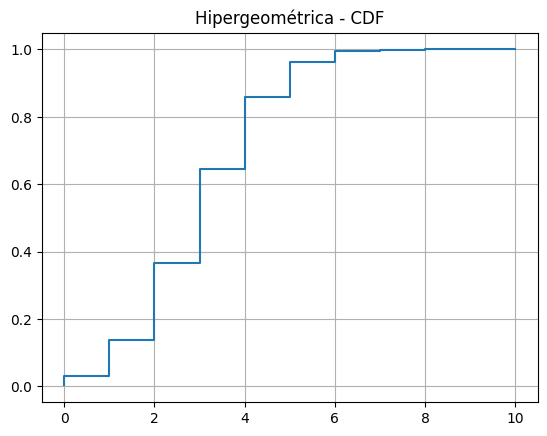

In [25]:
# Hipergeométrica
# N=50 población, K=20 éxitos, n=10 muestra
x = np.arange(0,11)

plt.stem(x, hypergeom.pmf(x,50,20,10))
plt.title("Hipergeométrica - PMF")
plt.grid()
plt.show()

plt.step(x, hypergeom.cdf(x,50,20,10))
plt.title("Hipergeométrica - CDF")
plt.grid()
plt.show()

#  Distribución de Cauchy

Sea:

$$
X \sim Cauchy(x_0,\gamma)
$$

donde:
- $x_0$ es el parámetro de localización  
- $\gamma>0$ es el parámetro de escala  



###  Soporte

$$
-\infty < x < \infty
$$



###  Función de densidad (PDF)

$$
f(x)=
\dfrac{1}{\pi\gamma}
\left[
1+\left(\dfrac{x-x_0}{\gamma}\right)^2
\right]^{-1}
$$



###  Función de distribución acumulada (CDF)

$$
F(x)=
\dfrac{1}{\pi}
\arctan\left(
\dfrac{x-x_0}{\gamma}
\right)
+\frac{1}{2}
$$



###  Media

No existe.



###  Varianza

No existe.



###  Simulación (método inversa)

Si $U \sim U(0,1)$:

$$
X=
x_0+
\gamma
\tan\left[\pi\left(U-\frac{1}{2}\right)\right]
$$

### Pseudocódigo – Cauchy

1. Generar U ~ U(0,1)
2. X = x0 + γ * tan[ π (U - 1/2) ]
3. Retornar X

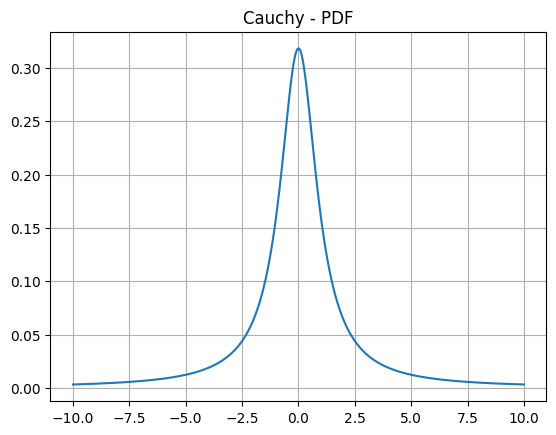

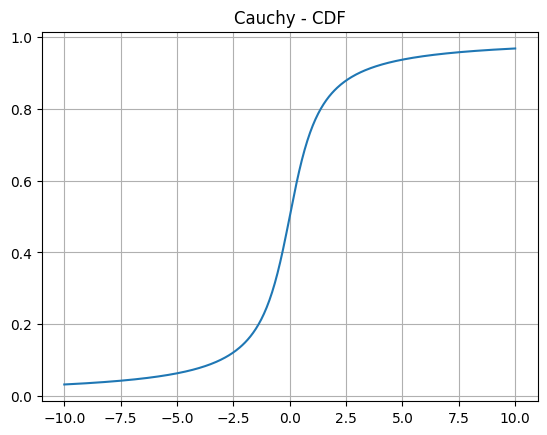

In [26]:
# Cauchy
x = np.linspace(-10,10,500)

plt.plot(x, cauchy.pdf(x))
plt.title("Cauchy - PDF")
plt.grid()
plt.show()

plt.plot(x, cauchy.cdf(x))
plt.title("Cauchy - CDF")
plt.grid()
plt.show()